In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install pydicom opencv-python tqdm torch torchvision scikit-learn matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu1

🚀 Starting Femur Segmentation Training
✅ GPU Available: Tesla T4
   Memory: 14.7 GB
📂 Loading dataset...
🔍 Scanning for .dcm files...
   Raw path: /kaggle/input/unet-dataset/data/raw
   Mask path: /kaggle/input/unet-dataset/data/mask
📁 Found 8 potential case directories


Processing cases: 100%|██████████| 8/8 [00:00<00:00, 33.61it/s]


✅ Found 4289 matched pairs
📊 Dataset initialized with 3431 samples
📊 Dataset initialized with 858 samples
📊 Data split complete:
   Training samples: 3431
   Validation samples: 858
   Batch size: 8
🏗️  UNet Model initialized
   Parameters: 31,042,369
🖼️  Showing 3 sample images...


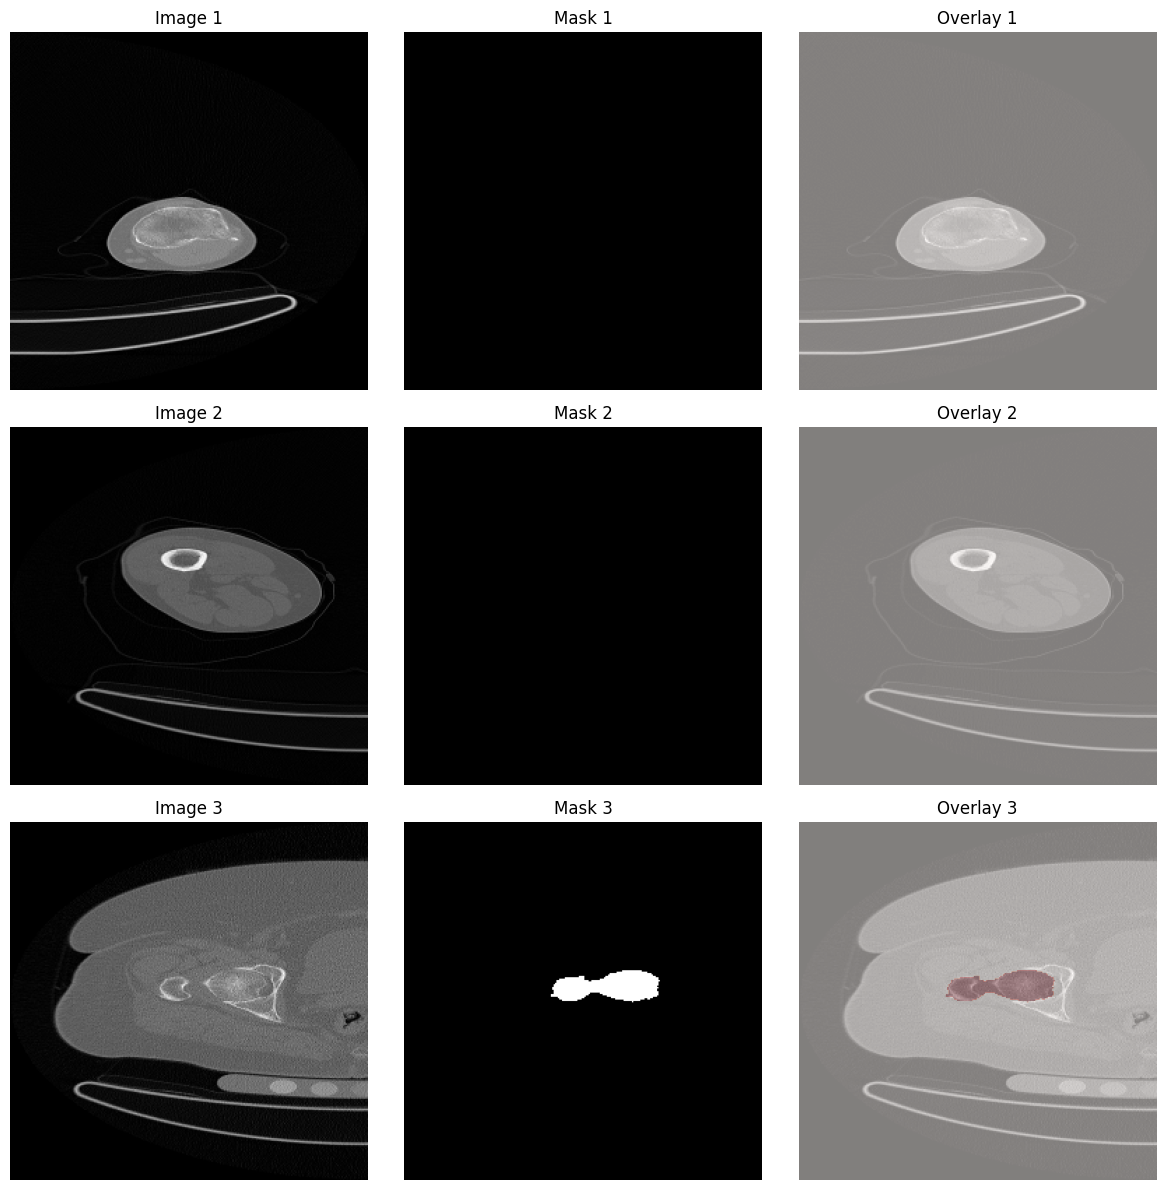

🚀 Starting training for 5 epochs


Epoch 1/5 [Val]: 100%|██████████| 108/108 [00:19<00:00,  5.49it/s, Loss=0.5864, Avg=2.3720]



📊 Epoch 1/5 Summary:
   Train Loss: 0.6354
   Val Loss: 0.5971
   Time: 231.5s
   ✅ New best model saved! (Val Loss: 0.5971)
--------------------------------------------------


Epoch 2/5 [Val]: 100%|██████████| 108/108 [00:19<00:00,  5.49it/s, Loss=0.5212, Avg=2.0489]



📊 Epoch 2/5 Summary:
   Train Loss: 0.5395
   Val Loss: 0.5158
   Time: 240.3s
   ✅ New best model saved! (Val Loss: 0.5158)
--------------------------------------------------


Epoch 3/5 [Val]: 100%|██████████| 108/108 [00:19<00:00,  5.49it/s, Loss=0.4600, Avg=1.7621]



📊 Epoch 3/5 Summary:
   Train Loss: 0.4694
   Val Loss: 0.4436
   Time: 240.8s
   ✅ New best model saved! (Val Loss: 0.4436)
--------------------------------------------------


Epoch 4/5 [Val]: 100%|██████████| 108/108 [00:19<00:00,  5.49it/s, Loss=0.3364, Avg=1.1819]



📊 Epoch 4/5 Summary:
   Train Loss: 0.3740
   Val Loss: 0.2975
   Time: 240.9s
   ✅ New best model saved! (Val Loss: 0.2975)
--------------------------------------------------


Epoch 5/5 [Val]: 100%|██████████| 108/108 [00:19<00:00,  5.52it/s, Loss=0.2877, Avg=1.0203]



📊 Epoch 5/5 Summary:
   Train Loss: 0.2273
   Val Loss: 0.2569
   Time: 239.7s
   ✅ New best model saved! (Val Loss: 0.2569)
--------------------------------------------------


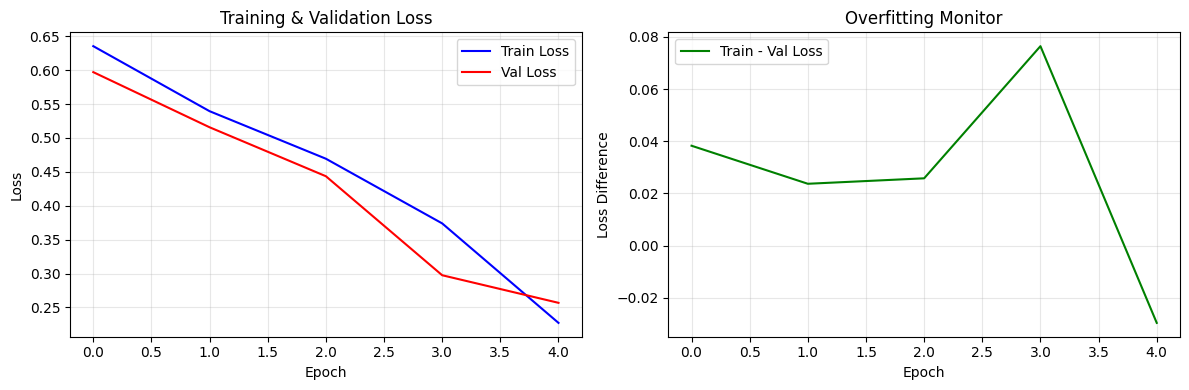

🔮 Generating predictions for 3 samples...


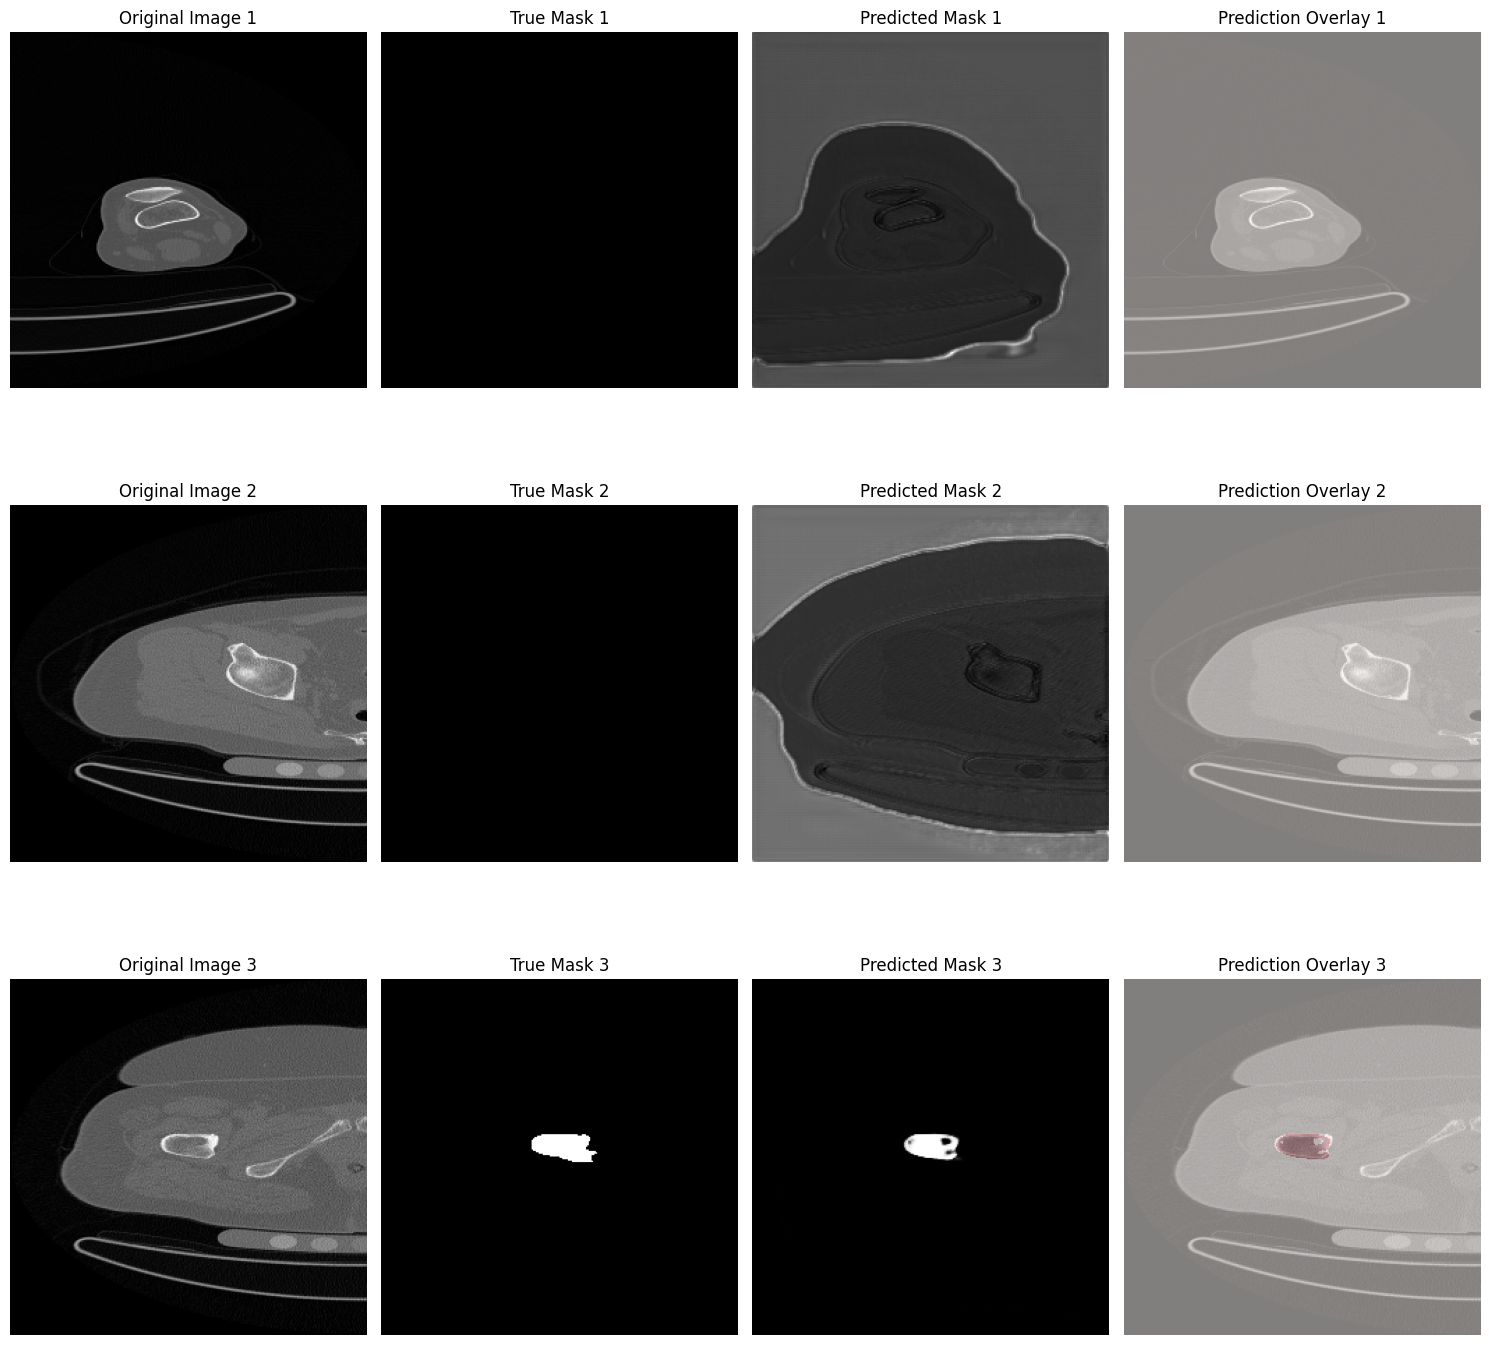

🎉 Training completed successfully!
   Best validation loss: 0.2569
   Model saved as 'best_model.pth'


In [4]:
# Install required packages (run this in Kaggle notebook cell)
# !pip install pydicom opencv-python tqdm

# Imports
import os
import numpy as np
import pydicom
import cv2
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')

# Kaggle-specific configurations
print("🚀 Starting Femur Segmentation Training")
print("=" * 50)

# Device setup with verbose output
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"✅ GPU Available: {torch.cuda.get_device_name(0)}")
    print(f"   Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
else:
    device = torch.device('cpu')
    print("⚠️  Using CPU (consider enabling GPU in Kaggle)")

# Paths - Updated for Kaggle environment
# In Kaggle, datasets are usually mounted at /kaggle/input/
raw_path = '/kaggle/input/unet-dataset/data/raw'  # Update this path
mask_path = '/kaggle/input/unet-dataset/data/mask'  # Update this path

# Alternative paths for different dataset structures
if not os.path.exists(raw_path):
    # Try common Kaggle dataset structures
    possible_paths = [
        '/kaggle/input/*/raw',
        '/kaggle/input/*/images',
        '/kaggle/input/*/train/images',
        'data/raw',
        '../input/*/raw'
    ]
    
    print("🔍 Dataset not found at default path. Searching...")
    for path_pattern in possible_paths:
        import glob
        matches = glob.glob(path_pattern)
        if matches:
            raw_path = matches[0]
            print(f"✅ Found raw data at: {raw_path}")
            break
    else:
        print("❌ Could not find dataset. Please update the paths manually.")
        print("   Available input directories:")
        if os.path.exists('/kaggle/input'):
            for item in os.listdir('/kaggle/input'):
                print(f"   - /kaggle/input/{item}")

image_size = (256, 256)

# Dataset class with improved error handling
class FemurDataset(Dataset):
    def __init__(self, image_files, mask_files):
        self.image_files = image_files
        self.mask_files = mask_files
        print(f"📊 Dataset initialized with {len(image_files)} samples")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        try:
            # Load DICOM image
            img_path = self.image_files[idx]
            ds_img = pydicom.dcmread(img_path)
            img = ds_img.pixel_array.astype(np.float32)
            img = cv2.resize(img, image_size)
            
            # Improved normalization
            img_min, img_max = img.min(), img.max()
            if img_max > img_min:
                img = (img - img_min) / (img_max - img_min)
            else:
                img = np.zeros_like(img)
            img = np.expand_dims(img, axis=0)

            # Load DICOM mask
            mask_path = self.mask_files[idx]
            ds_mask = pydicom.dcmread(mask_path)
            mask = ds_mask.pixel_array.astype(np.float32)
            mask = cv2.resize(mask, image_size, interpolation=cv2.INTER_NEAREST)
            mask = (mask > 0).astype(np.float32)  # binarize
            mask = np.expand_dims(mask, axis=0)

            return torch.tensor(img), torch.tensor(mask)
        
        except Exception as e:
            print(f"❌ Error loading sample {idx}: {e}")
            # Return zero tensors as fallback
            return torch.zeros(1, *image_size), torch.zeros(1, *image_size)

# Enhanced file collection with progress tracking
def collect_file_pairs(raw_root, mask_root, ext=".dcm"):
    print(f"🔍 Scanning for {ext} files...")
    print(f"   Raw path: {raw_root}")
    print(f"   Mask path: {mask_root}")
    
    if not os.path.exists(raw_root):
        print(f"❌ Raw path doesn't exist: {raw_root}")
        return [], []
    
    if not os.path.exists(mask_root):
        print(f"❌ Mask path doesn't exist: {mask_root}")
        return [], []
    
    image_paths, mask_paths = [], []
    cases = sorted(os.listdir(raw_root))
    
    print(f"📁 Found {len(cases)} potential case directories")
    
    for case in tqdm(cases, desc="Processing cases"):
        raw_dir = os.path.join(raw_root, case)
        mask_dir = os.path.join(mask_root, case.replace("-input", "-seg"))
        
        if not os.path.isdir(raw_dir) or not os.path.isdir(mask_dir): 
            continue

        raw_files = sorted([f for f in os.listdir(raw_dir) if f.endswith(ext)])
        mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith(ext)])

        raw_map = {os.path.splitext(f)[0]: os.path.join(raw_dir, f) for f in raw_files}
        mask_map = {os.path.splitext(f)[0]: os.path.join(mask_dir, f) for f in mask_files}

        common = sorted(set(raw_map) & set(mask_map))
        image_paths.extend([raw_map[k] for k in common])
        mask_paths.extend([mask_map[k] for k in common])

    print(f"✅ Found {len(image_paths)} matched pairs")
    return image_paths, mask_paths

# Enhanced UNet with batch normalization
class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        def CBR(in_c, out_c): 
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU(inplace=True),
            )
        
        # Encoder
        self.enc1 = CBR(1, 64)
        self.enc2 = CBR(64, 128)
        self.enc3 = CBR(128, 256)
        self.enc4 = CBR(256, 512)
        self.pool = nn.MaxPool2d(2)
        
        # Bottleneck
        self.middle = CBR(512, 1024)
        
        # Decoder
        self.up4 = nn.ConvTranspose2d(1024, 512, 2, 2)
        self.dec4 = CBR(1024, 512)
        self.up3 = nn.ConvTranspose2d(512, 256, 2, 2)
        self.dec3 = CBR(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, 2)
        self.dec2 = CBR(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, 2)
        self.dec1 = CBR(128, 64)
        
        # Final layer
        self.final = nn.Conv2d(64, 1, 1)
        
        print(f"🏗️  UNet Model initialized")
        print(f"   Parameters: {sum(p.numel() for p in self.parameters()):,}")

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        e4 = self.enc4(self.pool(e3))
        
        # Bottleneck
        m = self.middle(self.pool(e4))
        
        # Decoder with skip connections
        d4 = self.dec4(torch.cat([self.up4(m), e4], 1))
        d3 = self.dec3(torch.cat([self.up3(d4), e3], 1))
        d2 = self.dec2(torch.cat([self.up2(d3), e2], 1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1], 1))
        
        return torch.sigmoid(self.final(d1))

# Enhanced loss function
class DiceBCELoss(nn.Module):
    def __init__(self, dice_weight=0.5, bce_weight=0.5):
        super().__init__()
        self.dice_weight = dice_weight
        self.bce_weight = bce_weight
        self.bce = nn.BCELoss()

    def forward(self, y_pred, y_true, smooth=1e-5):
        # Flatten tensors
        y_pred_flat = y_pred.view(-1)
        y_true_flat = y_true.view(-1)
        
        # Dice loss
        intersection = (y_pred_flat * y_true_flat).sum()
        dice = (2. * intersection + smooth) / (y_pred_flat.sum() + y_true_flat.sum() + smooth)
        dice_loss = 1 - dice
        
        # BCE loss
        bce_loss = self.bce(y_pred_flat, y_true_flat)
        
        # Combined loss
        total_loss = self.dice_weight * dice_loss + self.bce_weight * bce_loss
        return total_loss

# Enhanced training function with detailed progress tracking
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    print(f"🚀 Starting training for {num_epochs} epochs")
    print("=" * 50)
    
    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        epoch_start_time = time.time()
        
        # Training phase
        model.train()
        total_loss = 0
        train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]")
        
        for batch_idx, (imgs, masks) in enumerate(train_pbar):
            imgs, masks = imgs.to(device), masks.to(device)
            
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item() * imgs.size(0)
            
            # Update progress bar
            train_pbar.set_postfix({
                'Loss': f'{loss.item():.4f}',
                'Avg': f'{total_loss / ((batch_idx + 1) * imgs.size(0)):.4f}'
            })
        
        avg_train_loss = total_loss / len(train_loader.dataset)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        val_loss = 0
        val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]")
        
        with torch.no_grad():
            for batch_idx, (imgs, masks) in enumerate(val_pbar):
                imgs, masks = imgs.to(device), masks.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, masks)
                val_loss += loss.item() * imgs.size(0)
                
                # Update progress bar
                val_pbar.set_postfix({
                    'Loss': f'{loss.item():.4f}',
                    'Avg': f'{val_loss / ((batch_idx + 1) * imgs.size(0)):.4f}'
                })
        
        avg_val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(avg_val_loss)
        
        # Calculate epoch time
        epoch_time = time.time() - epoch_start_time
        
        # Print epoch summary
        print(f"\n📊 Epoch {epoch+1}/{num_epochs} Summary:")
        print(f"   Train Loss: {avg_train_loss:.4f}")
        print(f"   Val Loss: {avg_val_loss:.4f}")
        print(f"   Time: {epoch_time:.1f}s")
        
        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print(f"   ✅ New best model saved! (Val Loss: {best_val_loss:.4f})")
        
        print("-" * 50)

    # Plot training curves
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss", color='blue')
    plt.plot(val_losses, label="Val Loss", color='red')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.array(train_losses) - np.array(val_losses), label="Train - Val Loss", color='green')
    plt.xlabel("Epoch")
    plt.ylabel("Loss Difference")
    plt.title("Overfitting Monitor")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return train_losses, val_losses

# Enhanced visualization function
def show_sample_batch(loader, n=3):
    print(f"🖼️  Showing {n} sample images...")
    imgs, masks = next(iter(loader))
    
    plt.figure(figsize=(12, 4 * n))
    for i in range(min(n, len(imgs))):
        img = imgs[i].squeeze().numpy()
        mask = masks[i].squeeze().numpy()
        
        plt.subplot(n, 3, i * 3 + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Image {i+1}")
        plt.axis('off')
        
        plt.subplot(n, 3, i * 3 + 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f"Mask {i+1}")
        plt.axis('off')
        
        plt.subplot(n, 3, i * 3 + 3)
        plt.imshow(img, cmap='gray', alpha=0.7)
        plt.imshow(mask, cmap='Reds', alpha=0.3)
        plt.title(f"Overlay {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Model prediction visualization
def visualize_predictions(model, val_loader, n=3):
    print(f"🔮 Generating predictions for {n} samples...")
    model.eval()
    
    imgs, masks = next(iter(val_loader))
    imgs = imgs.to(device)
    
    with torch.no_grad():
        predictions = model(imgs)
    
    predictions = predictions.cpu()
    
    plt.figure(figsize=(15, 5 * n))
    for i in range(min(n, len(imgs))):
        img = imgs[i].cpu().squeeze().numpy()
        true_mask = masks[i].squeeze().numpy()
        pred_mask = predictions[i].squeeze().numpy()
        
        plt.subplot(n, 4, i * 4 + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Original Image {i+1}")
        plt.axis('off')
        
        plt.subplot(n, 4, i * 4 + 2)
        plt.imshow(true_mask, cmap='gray')
        plt.title(f"True Mask {i+1}")
        plt.axis('off')
        
        plt.subplot(n, 4, i * 4 + 3)
        plt.imshow(pred_mask, cmap='gray')
        plt.title(f"Predicted Mask {i+1}")
        plt.axis('off')
        
        plt.subplot(n, 4, i * 4 + 4)
        plt.imshow(img, cmap='gray', alpha=0.7)
        plt.imshow(pred_mask > 0.5, cmap='Reds', alpha=0.3)
        plt.title(f"Prediction Overlay {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    try:
        # Load and prepare data
        print("📂 Loading dataset...")
        raw_files, mask_files = collect_file_pairs(raw_path, mask_path)
        
        if len(raw_files) == 0:
            print("❌ No data found! Please check your dataset paths.")
            print("   Update the raw_path and mask_path variables at the top of the script.")
        else:
            # Split data
            train_images, val_images, train_masks, val_masks = train_test_split(
                raw_files, mask_files, test_size=0.2, random_state=42
            )
            
            # Create datasets and dataloaders
            train_dataset = FemurDataset(train_images, train_masks)
            val_dataset = FemurDataset(val_images, val_masks)
            
            # Adjust batch size based on available memory
            batch_size = 8 if torch.cuda.is_available() else 4
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            
            print(f"📊 Data split complete:")
            print(f"   Training samples: {len(train_dataset)}")
            print(f"   Validation samples: {len(val_dataset)}")
            print(f"   Batch size: {batch_size}")
            
            # Initialize model, loss, and optimizer
            model = UNet().to(device)
            criterion = DiceBCELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
            
            # Show sample data
            if len(train_dataset) > 0:
                show_sample_batch(train_loader)
                
                # Train the model
                train_losses, val_losses = train_model(
                    model, train_loader, val_loader, criterion, optimizer, num_epochs=5
                )
                
                # Show predictions
                visualize_predictions(model, val_loader)
                
                print("🎉 Training completed successfully!")
                print(f"   Best validation loss: {min(val_losses):.4f}")
                print(f"   Model saved as 'best_model.pth'")
            else:
                print("❌ No training data available!")
                
    except Exception as e:
        print(f"❌ An error occurred: {e}")
        import traceback
        traceback.print_exc()